In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
from collections import Counter
import math
from datetime import datetime

warnings.filterwarnings('ignore')

# Set style for professional look
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Setup complete! Libraries imported successfully.")
print(f"⏰ Current time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Setup complete! Libraries imported successfully.
⏰ Current time: 2026-02-06 13:21:22


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df_from_drive = pd.read_json('/content/drive/MyDrive/Conversational_Transcript_Dataset.json')
display(df_from_drive.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,transcripts
0,"{'transcript_id': '6794-8660-4606-3216', 'time..."
1,"{'transcript_id': '7034-5430-2980-5483', 'time..."
2,"{'transcript_id': '1846-5500-2990-8975', 'time..."
3,"{'transcript_id': '1616-8531-3291-5075', 'time..."
4,"{'transcript_id': '7441-4348-3458-2384', 'time..."


In [ ]:
file_path = '/content/drive/MyDrive/Conversational_Transcript_Dataset.json'

# Load JSON data
with open(file_path, 'r') as f:
    data = json.load(f)

transcripts = data['transcripts']
print(f"\n📊 Total transcripts loaded: {len(transcripts)}")

# Convert to DataFrame
df_records = []
for transcript in transcripts:
    record = {
        'transcript_id': transcript.get('transcript_id'),
        'time_of_interaction': transcript.get('time_of_interaction'),
        'domain': transcript.get('domain'),
        'intent': transcript.get('intent'),
        'reason_for_call': transcript.get('reason_for_call'),
        'conversation': transcript.get('conversation', [])
    }
    df_records.append(record)

df = pd.DataFrame(df_records)
print(f"✅ DataFrame created with shape: {df.shape}")
print(f"📝 Columns: {list(df.columns)}")


📊 Total transcripts loaded: 5037
✅ DataFrame created with shape: (5037, 6)
📝 Columns: ['transcript_id', 'time_of_interaction', 'domain', 'intent', 'reason_for_call', 'conversation']


In [ ]:
print("=" * 80)
print("BASIC DATA INFORMATION")
print("=" * 80)

print(f"\n📊 Dataset Shape: {df.shape}")
print(f"📁 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📋 Column Information:")
for col in df.columns:
    print(f"\n{'─' * 60}")
    print(f"🔹 Column: '{col}'")
    print(f"   • Dtype: {df[col].dtype}")
    print(f"   • Non-null: {df[col].notna().sum()} / {len(df)}")
    print(f"   • Nulls: {df[col].isna().sum()}")
    if col != 'conversation':
        print(f"   • Unique: {df[col].nunique()}")
    else:
        print(f"   • Structure: List of dictionaries")

print("\n\n📝 Sample Data:")
display(df.head(3))

BASIC DATA INFORMATION

📊 Dataset Shape: (5037, 6)
📁 Memory Usage: 3.41 MB

📋 Column Information:

────────────────────────────────────────────────────────────
🔹 Column: 'transcript_id'
   • Dtype: object
   • Non-null: 5037 / 5037
   • Nulls: 0
   • Unique: 5037

────────────────────────────────────────────────────────────
🔹 Column: 'time_of_interaction'
   • Dtype: object
   • Non-null: 5037 / 5037
   • Nulls: 0
   • Unique: 4984

────────────────────────────────────────────────────────────
🔹 Column: 'domain'
   • Dtype: object
   • Non-null: 5037 / 5037
   • Nulls: 0
   • Unique: 7

────────────────────────────────────────────────────────────
🔹 Column: 'intent'
   • Dtype: object
   • Non-null: 5037 / 5037
   • Nulls: 0
   • Unique: 41

────────────────────────────────────────────────────────────
🔹 Column: 'reason_for_call'
   • Dtype: object
   • Non-null: 5037 / 5037
   • Nulls: 0
   • Unique: 4547

────────────────────────────────────────────────────────────
🔹 Column: 'conversati

,transcript_id,time_of_interaction,domain,intent,reason_for_call,conversation
0,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,"[{'speaker': 'Agent', 'text': 'Hello, thank yo..."
1,7034-5430-2980-5483,2025-09-17 13:33:00,Healthcare Services,Escalation - Repeated Service Failures,Customer Jerry Chavez escalated to supervisor ...,"[{'speaker': 'Agent', 'text': 'Thank you for c..."
2,1846-5500-2990-8975,2025-04-24 15:31:00,Insurance,Fraud Alert Investigation,Customer Kyle Davis received fraud alert for u...,"[{'speaker': 'Agent', 'text': 'Thank you for c..."


In [ ]:
print("=" * 80)
print("CONVERSATION STRUCTURE ANALYSIS")
print("=" * 80)

# Calculate conversation lengths
df['conv_length'] = df['conversation'].apply(len)

print("\n📊 Conversation Length Statistics:")
print(df['conv_length'].describe())

print(f"\n🔍 Conversation Length Details:")
print(f"   • Shortest: {df['conv_length'].min()} turns")
print(f"   • Longest: {df['conv_length'].max()} turns")
print(f"   • Mean: {df['conv_length'].mean():.2f} turns")
print(f"   • Median: {df['conv_length'].median():.2f} turns")

# Check first speaker
first_speakers = df['conversation'].apply(lambda x: x[0]['speaker'] if x else None)
print(f"\n🗣️ First Speaker Distribution:")
print(first_speakers.value_counts())

# Check for single-speaker conversations
single_speaker = df['conversation'].apply(
    lambda x: len(set(turn['speaker'] for turn in x)) == 1 if x else False
).sum()
print(f"\n⚠️ Single-speaker conversations: {single_speaker}")

# Sample conversation structure
print(f"\n📝 Sample Conversation Structure:")
sample_conv = df['conversation'].iloc[0]
print(f"   • Number of turns: {len(sample_conv)}")
print(f"   • First turn keys: {list(sample_conv[0].keys())}")
print(f"\nFirst 3 turns:")
for i, turn in enumerate(sample_conv[:3]):
    print(f"   Turn {i+1}: {turn['speaker']} - {turn['text'][:60]}...")

CONVERSATION STRUCTURE ANALYSIS

📊 Conversation Length Statistics:
count    5037.00000
mean       16.76891
std         6.54014
min        11.00000
25%        14.00000
50%        14.00000
75%        17.00000
max        59.00000
Name: conv_length, dtype: float64

🔍 Conversation Length Details:
   • Shortest: 11 turns
   • Longest: 59 turns
   • Mean: 16.77 turns
   • Median: 14.00 turns

🗣️ First Speaker Distribution:
conversation
Agent    5037
Name: count, dtype: int64

⚠️ Single-speaker conversations: 0

📝 Sample Conversation Structure:
   • Number of turns: 15
   • First turn keys: ['speaker', 'text']

First 3 turns:
   Turn 1: Agent - Hello, thank you for contacting BuyNow. This is Emma. How ca...
   Turn 2: Customer - Hello, I'm calling about an order that shows delivered but I...
   Turn 3: Agent - I'm sorry to hear that. I'll definitely help you look into t...


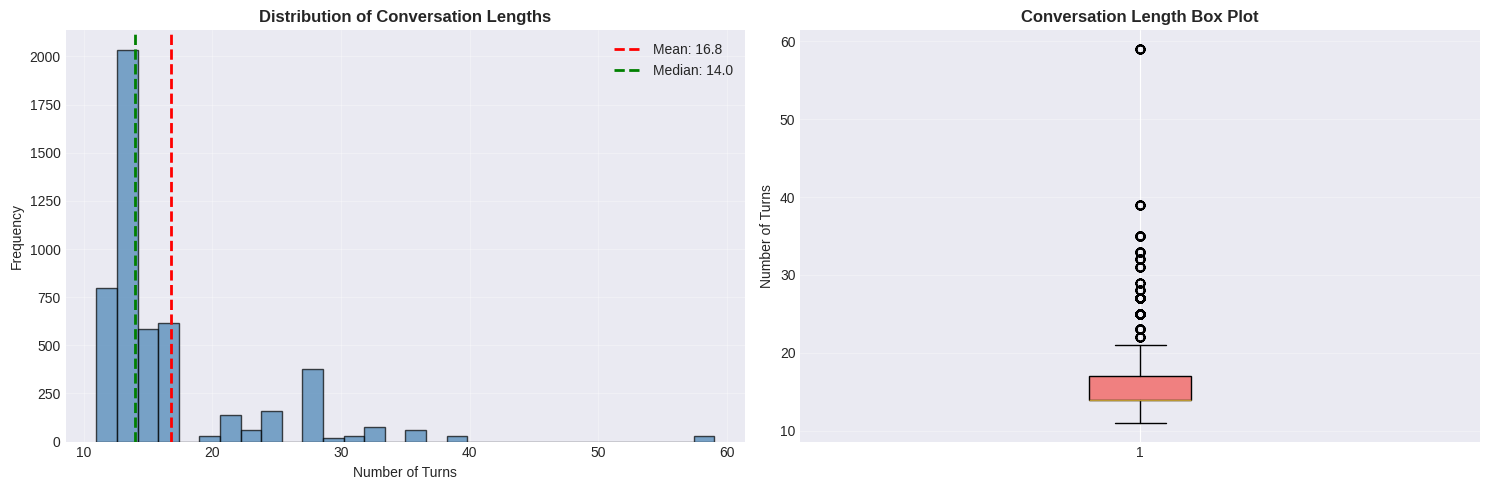


📈 Outlier Analysis (IQR method):
   • Q1: 14.0, Q3: 17.0, IQR: 3.0
   • Lower bound: 9.5, Upper bound: 21.5
   • Outliers detected: 868


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['conv_length'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['conv_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["conv_length"].mean():.1f}')
axes[0].axvline(df['conv_length'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["conv_length"].median():.1f}')
axes[0].set_xlabel('Number of Turns')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Conversation Lengths', fontweight='bold', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot
bp = axes[1].boxplot(df['conv_length'], vert=True, patch_artist=True)
bp['boxes'][0].set_facecolor('lightcoral')
axes[1].set_ylabel('Number of Turns')
axes[1].set_title('Conversation Length Box Plot', fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"\n📈 Outlier Analysis (IQR method):")
Q1 = df['conv_length'].quantile(0.25)
Q3 = df['conv_length'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df['conv_length'] < lower_bound) | (df['conv_length'] > upper_bound)).sum()
print(f"   • Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"   • Lower bound: {lower_bound:.1f}, Upper bound: {upper_bound:.1f}")
print(f"   • Outliers detected: {outliers}")

In [ ]:
print("=" * 80)
print("CATEGORICAL DATA ANALYSIS")
print("=" * 80)

# Domain analysis
print("\n🏢 DOMAIN DISTRIBUTION:")
domain_counts = df['domain'].value_counts()
print(domain_counts)

# Intent analysis
print("\n\n🎯 TOP 15 INTENTS:")
intent_counts = df['intent'].value_counts().head(15)
print(intent_counts)

# Check for duplicates
print(f"\n🔄 DUPLICATE CHECKS:")
print(f"   • Duplicate transcript IDs: {df['transcript_id'].duplicated().sum()}")
print(f"   • Duplicate reasons: {df['reason_for_call'].duplicated().sum()}")

# Reason length analysis
df['reason_length'] = df['reason_for_call'].str.len()
print(f"\n📏 REASON FOR CALL LENGTH:")
print(df['reason_length'].describe())

CATEGORICAL DATA ANALYSIS

🏢 DOMAIN DISTRIBUTION:
domain
Healthcare Services     967
Banking & Finance       778
E-commerce & Retail     715
Telecommunications      683
Insurance               651
Travel & Hospitality    647
Technology Support      596
Name: count, dtype: int64


🎯 TOP 15 INTENTS:
intent
Escalation - Repeated Service Failures               490
Appointment Scheduling                               424
Service Interruptions                                391
Escalation - Threat of Legal Action                  375
Account Access Issues                                371
Claim Denials                                        326
Delivery Investigation                               319
Fraud Alert Investigation                            265
Multiple Issues - Returns & Account Inquiries        178
Multiple Issues - Order Status, Billing & Account    175
Reservation Modifications                            169
Update Failures                                      167
Business E

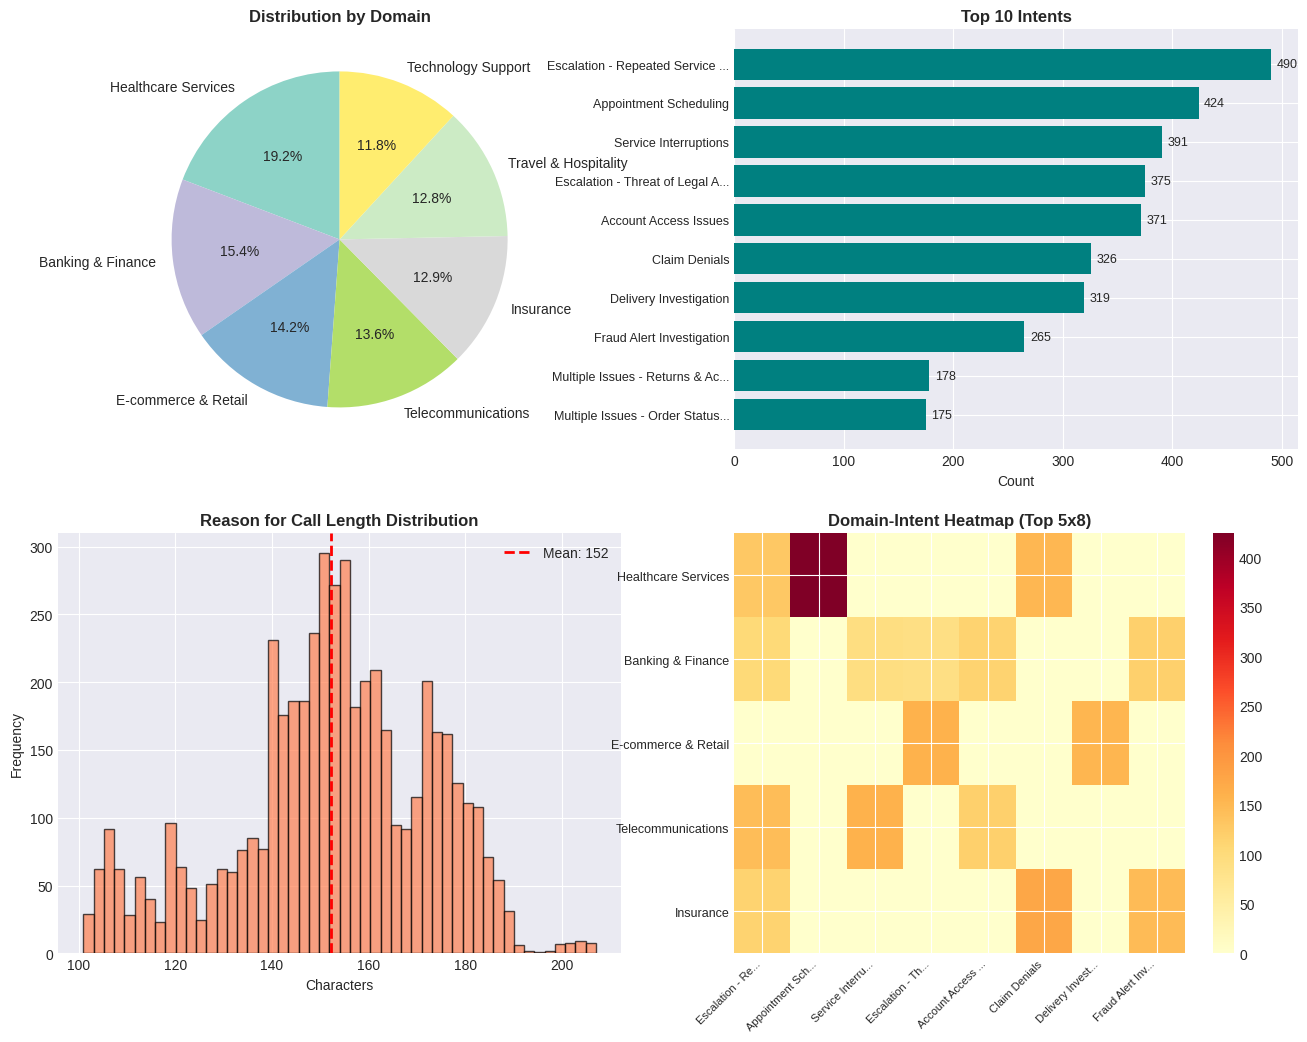

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Domain pie chart
domain_counts = df['domain'].value_counts()
colors = plt.cm.Set3(np.linspace(0, 1, len(domain_counts)))
wedges, texts, autotexts = axes[0, 0].pie(domain_counts.values, labels=domain_counts.index,
                                          autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('Distribution by Domain', fontweight='bold', fontsize=12)

# Intent bar chart (top 10)
top_intents = df['intent'].value_counts().head(10)
bars = axes[0, 1].barh(range(len(top_intents)), top_intents.values, color='teal')
axes[0, 1].set_yticks(range(len(top_intents)))
axes[0, 1].set_yticklabels([label[:30] + '...' if len(label) > 30 else label
                            for label in top_intents.index], fontsize=9)
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_title('Top 10 Intents', fontweight='bold', fontsize=12)
axes[0, 1].invert_yaxis()
for i, v in enumerate(top_intents.values):
    axes[0, 1].text(v + 5, i, str(v), va='center', fontsize=9)

# Reason length distribution
axes[1, 0].hist(df['reason_length'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(df['reason_length'].mean(), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {df["reason_length"].mean():.0f}')
axes[1, 0].set_xlabel('Characters')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Reason for Call Length Distribution', fontweight='bold', fontsize=12)
axes[1, 0].legend()

# Domain-Intent heatmap (sample)
sample_crosstab = pd.crosstab(df['domain'], df['intent'])
# Select top domains and intents for visibility
top_domains = df['domain'].value_counts().head(5).index
top_intents_vis = df['intent'].value_counts().head(8).index
filtered_crosstab = sample_crosstab.loc[top_domains, top_intents_vis]

im = axes[1, 1].imshow(filtered_crosstab.values, cmap='YlOrRd', aspect='auto')
axes[1, 1].set_xticks(range(len(filtered_crosstab.columns)))
axes[1, 1].set_yticks(range(len(filtered_crosstab.index)))
axes[1, 1].set_xticklabels([label[:15] + '...' if len(label) > 15 else label
                            for label in filtered_crosstab.columns], rotation=45, ha='right', fontsize=8)
axes[1, 1].set_yticklabels(filtered_crosstab.index, fontsize=9)
axes[1, 1].set_title('Domain-Intent Heatmap (Top 5x8)', fontweight='bold', fontsize=12)
plt.colorbar(im, ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [ ]:
print("=" * 80)
print("TEMPORAL DATA ANALYSIS")
print("=" * 80)

# Parse datetime
df['datetime'] = pd.to_datetime(df['time_of_interaction'])
df['date'] = df['datetime'].dt.date
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day_of_week'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour

print("\n📅 DATETIME PARSING:")
print(f"   • Successfully parsed: {df['datetime'].notna().sum()} / {len(df)}")
print(f"   • Date range: {df['datetime'].min()} to {df['datetime'].max()}")
print(f"   • Future dates: {(df['datetime'] > pd.Timestamp.now()).sum()}")

print("\n📊 TEMPORAL DISTRIBUTION:")
print(f"   • Years: {sorted(df['year'].unique())}")
print(f"   • Months: {sorted(df['month'].unique())}")
print(f"   • Hour range: {df['hour'].min()}:00 - {df['hour'].max()}:00")

# Monthly distribution
print(f"\n📅 MONTHLY COUNTS:")
monthly_counts = df['month'].value_counts().sort_index()
for month, count in monthly_counts.items():
    month_name = pd.to_datetime(f'2025-{month:02d}-01').strftime('%B')
    print(f"   • {month_name}: {count}")

# Check for duplicate timestamps
dup_times = df['time_of_interaction'].duplicated().sum()
print(f"\n⚠️ Duplicate timestamps: {dup_times}")

TEMPORAL DATA ANALYSIS

📅 DATETIME PARSING:
   • Successfully parsed: 5037 / 5037
   • Date range: 2025-01-01 10:09:00 to 2025-12-31 20:22:00
   • Future dates: 0

📊 TEMPORAL DISTRIBUTION:
   • Years: [np.int32(2025)]
   • Months: [np.int32(1), np.int32(2), np.int32(3), np.int32(4), np.int32(5), np.int32(6), np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]
   • Hour range: 0:00 - 23:00

📅 MONTHLY COUNTS:
   • January: 350
   • February: 313
   • March: 329
   • April: 361
   • May: 350
   • June: 321
   • July: 299
   • August: 345
   • September: 334
   • October: 1142
   • November: 561
   • December: 332

⚠️ Duplicate timestamps: 53


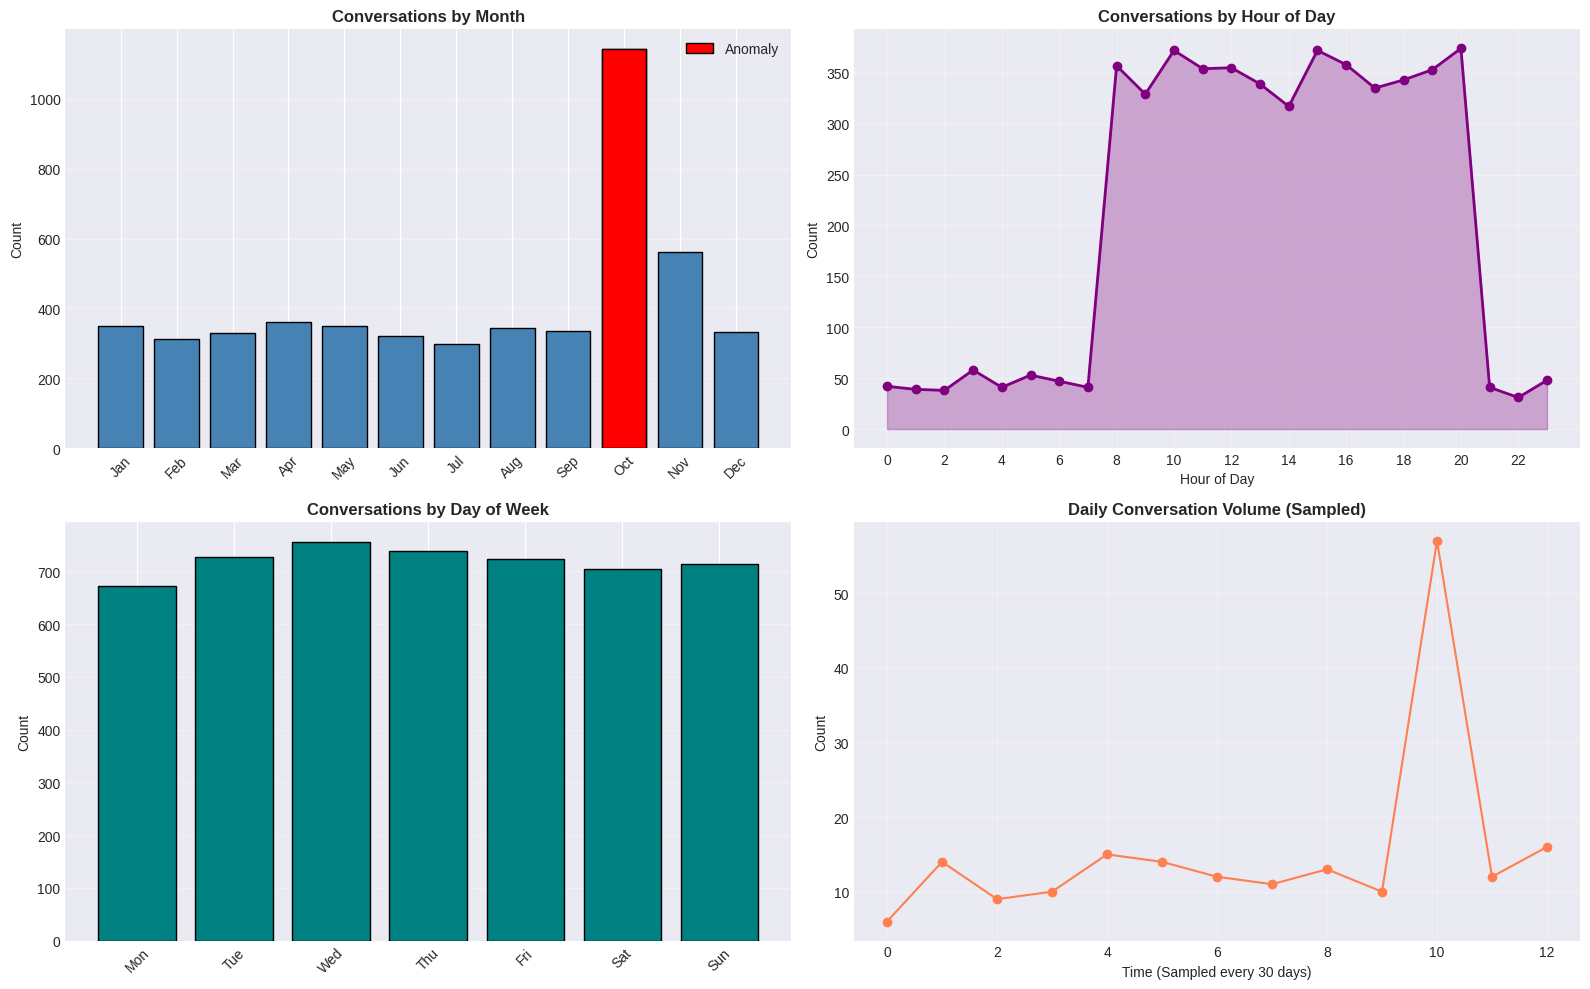


📈 Temporal Statistics:
   • Peak hour: 20:00 (374 conversations)
   • Quietest hour: 22:00 (31 conversations)
   • Peak day: Wednesday (756 conversations)


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Monthly distribution
monthly_counts = df.groupby('month').size()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0, 0].bar(monthly_counts.index, monthly_counts.values, color='steelblue', edgecolor='black')
axes[0, 0].set_xticks(range(1, 13))
axes[0, 0].set_xticklabels(months, rotation=45)
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Conversations by Month', fontweight='bold', fontsize=12)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Highlight October (if it has spike)
oct_count = monthly_counts.get(10, 0)
if oct_count > monthly_counts.mean() * 1.5:
    axes[0, 0].bar(10, oct_count, color='red', edgecolor='black', label='Anomaly')
    axes[0, 0].legend()

# Hourly distribution
hourly_counts = df.groupby('hour').size()
axes[0, 1].plot(hourly_counts.index, hourly_counts.values, marker='o', linewidth=2,
                markersize=6, color='purple')
axes[0, 1].fill_between(hourly_counts.index, hourly_counts.values, alpha=0.3, color='purple')
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Conversations by Hour of Day', fontweight='bold', fontsize=12)
axes[0, 1].set_xticks(range(0, 24, 2))
axes[0, 1].grid(True, alpha=0.3)

# Day of week distribution
dow_counts = df['day_of_week'].value_counts()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = dow_counts.reindex(dow_order)
axes[1, 0].bar(range(len(dow_counts)), dow_counts.values, color='teal', edgecolor='black')
axes[1, 0].set_xticks(range(len(dow_counts)))
axes[1, 0].set_xticklabels([d[:3] for d in dow_order], rotation=45)
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Conversations by Day of Week', fontweight='bold', fontsize=12)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Daily timeline (sample of dates)
daily_counts = df['date'].value_counts().sort_index()
# Sample every 30th day for visibility
sample_dates = daily_counts.iloc[::30]
axes[1, 1].plot(range(len(sample_dates)), sample_dates.values, marker='o', color='coral')
axes[1, 1].set_xlabel('Time (Sampled every 30 days)')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Daily Conversation Volume (Sampled)', fontweight='bold', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Temporal Statistics:")
print(f"   • Peak hour: {hourly_counts.idxmax()}:00 ({hourly_counts.max()} conversations)")
print(f"   • Quietest hour: {hourly_counts.idxmin()}:00 ({hourly_counts.min()} conversations)")
print(f"   • Peak day: {dow_counts.idxmax()} ({dow_counts.max()} conversations)")

In [ ]:
print("=" * 80)
print("TEXT CONTENT ANALYSIS")
print("=" * 80)

# Extract all utterances
all_utterances = []
speaker_stats = {'Agent': [], 'Customer': []}

for conv in df['conversation']:
    for turn in conv:
        speaker = turn.get('speaker', 'Unknown')
        text = turn.get('text', '')
        text_len = len(text)
        all_utterances.append(text_len)

        if speaker in speaker_stats:
            speaker_stats[speaker].append(text_len)

print(f"\n💬 OVERALL TEXT STATISTICS:")
print(f"   • Total utterances: {len(all_utterances)}")
print(f"   • Mean length: {np.mean(all_utterances):.1f} characters")
print(f"   • Median length: {np.median(all_utterances):.1f} characters")
print(f"   • Min: {np.min(all_utterances)}, Max: {np.max(all_utterances)}")

print(f"\n🗣️ SPEAKER-WISE STATISTICS:")
for speaker, lengths in speaker_stats.items():
    print(f"\n   {speaker}:")
    print(f"      • Turns: {len(lengths)}")
    print(f"      • Mean: {np.mean(lengths):.1f} chars")
    print(f"      • Median: {np.median(lengths):.1f} chars")

# Check for placeholder text
print(f"\n⚠️ PLACEHOLDER TEXT DETECTION:")
placeholder_count = 0
placeholder_types = {'[Provides': 0, '...': 0, 'other': 0}

for conv in df['conversation']:
    for turn in conv:
        text = turn.get('text', '')
        if '[Provides' in text:
            placeholder_types['[Provides'] += 1
            placeholder_count += 1
        elif '...' in text:
            placeholder_types['...'] += 1
            placeholder_count += 1
        elif '[' in text or ']' in text:
            placeholder_types['other'] += 1
            placeholder_count += 1

print(f"   • Total placeholder utterances: {placeholder_count}")
for ptype, count in placeholder_types.items():
    print(f"      • {ptype}: {count}")

# Check for very short texts
very_short = sum(1 for length in all_utterances if length < 10)
print(f"\n   • Very short texts (<10 chars): {very_short}")

TEXT CONTENT ANALYSIS

💬 OVERALL TEXT STATISTICS:
   • Total utterances: 84465
   • Mean length: 106.0 characters
   • Median length: 100.0 characters
   • Min: 5, Max: 308

🗣️ SPEAKER-WISE STATISTICS:

   Agent:
      • Turns: 43524
      • Mean: 135.5 chars
      • Median: 133.0 chars

   Customer:
      • Turns: 40941
      • Mean: 74.6 chars
      • Median: 70.0 chars

⚠️ PLACEHOLDER TEXT DETECTION:
   • Total placeholder utterances: 6353
      • [Provides: 483
      • ...: 5810
      • other: 60

   • Very short texts (<10 chars): 257


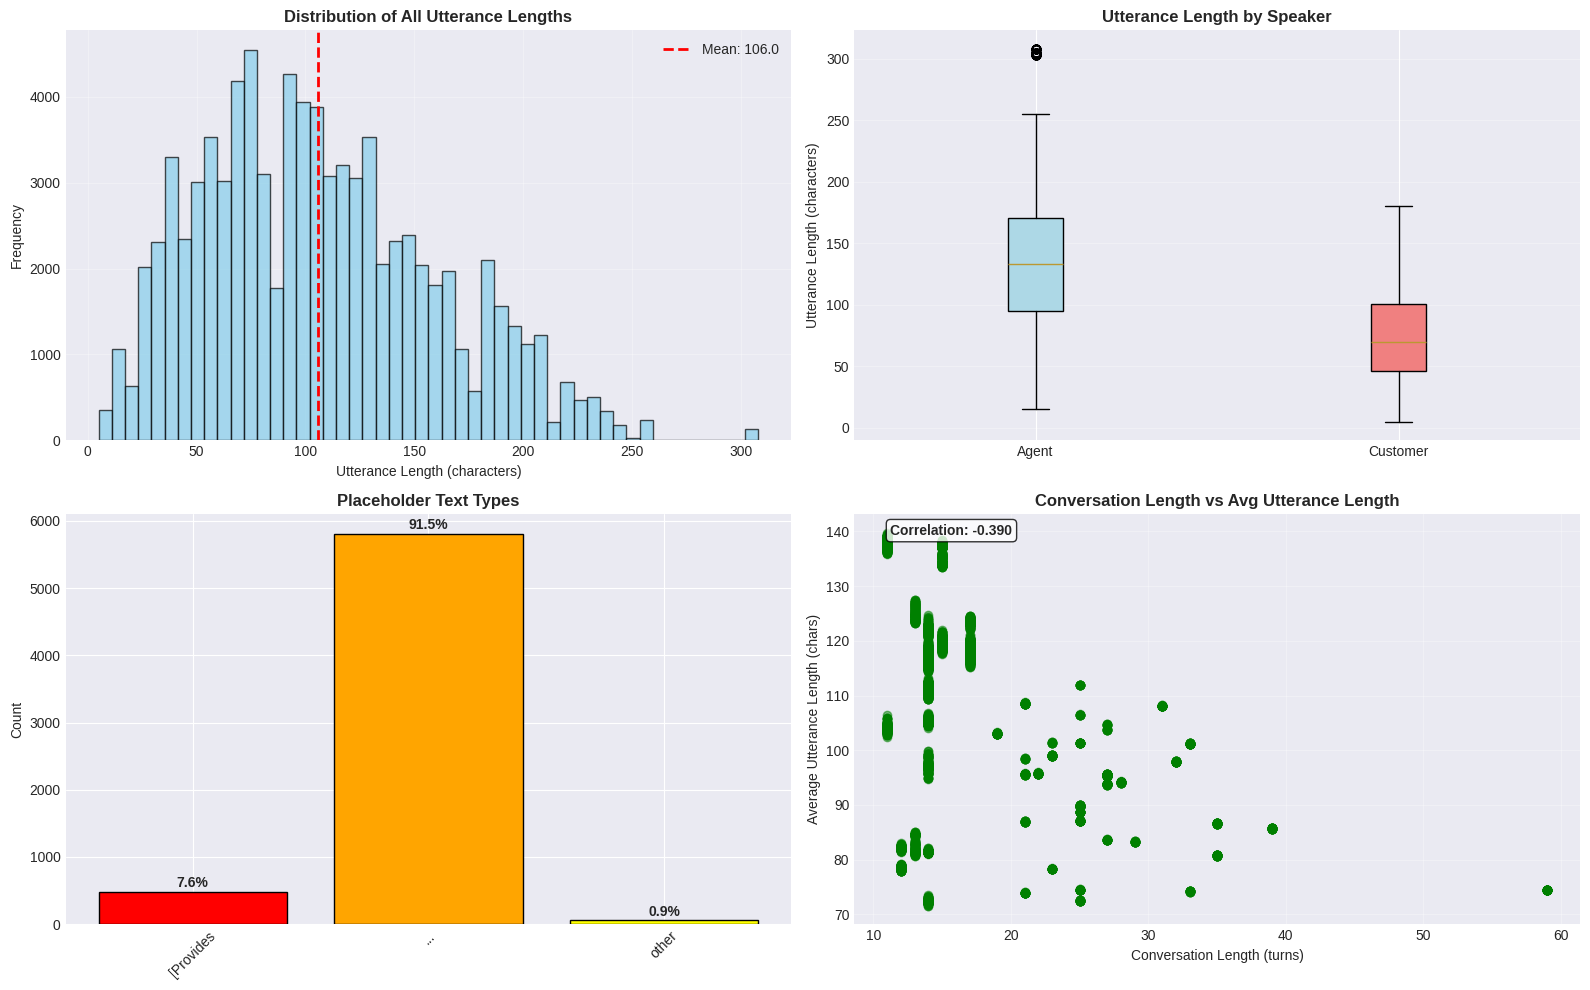

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Overall utterance length distribution
axes[0, 0].hist(all_utterances, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(np.mean(all_utterances), color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {np.mean(all_utterances):.1f}')
axes[0, 0].set_xlabel('Utterance Length (characters)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of All Utterance Lengths', fontweight='bold', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot by speaker
speaker_data = [speaker_stats['Agent'], speaker_stats['Customer']]
bp = axes[0, 1].boxplot(speaker_data, labels=['Agent', 'Customer'], patch_artist=True)
colors = ['lightblue', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
axes[0, 1].set_ylabel('Utterance Length (characters)')
axes[0, 1].set_title('Utterance Length by Speaker', fontweight='bold', fontsize=12)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Placeholder text distribution
if placeholder_count > 0:
    axes[1, 0].bar(placeholder_types.keys(), placeholder_types.values(),
                   color=['red', 'orange', 'yellow'], edgecolor='black')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('Placeholder Text Types', fontweight='bold', fontsize=12)
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Add percentage labels
    total = sum(placeholder_types.values())
    for i, (k, v) in enumerate(placeholder_types.items()):
        axes[1, 0].text(i, v + total*0.01, f'{v/total*100:.1f}%', ha='center', fontweight='bold')
else:
    axes[1, 0].text(0.5, 0.5, 'No Placeholder Text Found', ha='center', va='center',
                    transform=axes[1, 0].transAxes, fontsize=14)
    axes[1, 0].set_title('Placeholder Text Analysis', fontweight='bold', fontsize=12)

# Conversation length vs Utterance length scatter
conv_lengths_list = df['conv_length'].tolist()
avg_utterance_lengths = []
for conv in df['conversation']:
    avg_len = np.mean([len(turn.get('text', '')) for turn in conv])
    avg_utterance_lengths.append(avg_len)

axes[1, 1].scatter(conv_lengths_list, avg_utterance_lengths, alpha=0.5, color='green')
axes[1, 1].set_xlabel('Conversation Length (turns)')
axes[1, 1].set_ylabel('Average Utterance Length (chars)')
axes[1, 1].set_title('Conversation Length vs Avg Utterance Length', fontweight='bold', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

# Add correlation
correlation = np.corrcoef(conv_lengths_list, avg_utterance_lengths)[0, 1]
axes[1, 1].text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=axes[1, 1].transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
print("=" * 80)
print("SYNTHETIC DATA DETECTION ANALYSIS")
print("=" * 80)

# 1. Type-Token Ratio (Vocabulary Diversity)
print("\n📚 VOCABULARY DIVERSITY ANALYSIS:")

def calculate_ttr(texts):
    all_words = []
    for text in texts:
        all_words.extend(text.lower().split())
    unique_words = len(set(all_words))
    total_words = len(all_words)
    return unique_words / total_words if total_words > 0 else 0

# Sample for performance
sample_size = min(1000, len(df))
sample_df = df.sample(sample_size, random_state=42)

sample_texts = []
for conv in sample_df['conversation']:
    for turn in conv:
        sample_texts.append(turn.get('text', ''))

ttr = calculate_ttr(sample_texts)
print(f"   • Type-Token Ratio: {ttr:.4f}")
print(f"   • Interpretation: {'⚠️ LOW (Synthetic indicator)' if ttr < 0.3 else '✅ Normal'}")
print(f"   • Natural text TTR is typically 0.4-0.6")

# Separate TTR for speakers
agent_texts = [turn.get('text', '') for conv in sample_df['conversation']
               for turn in conv if turn.get('speaker') == 'Agent']
customer_texts = [turn.get('text', '') for conv in sample_df['conversation']
                  for turn in conv if turn.get('speaker') == 'Customer']

agent_ttr = calculate_ttr(agent_texts)
customer_ttr = calculate_ttr(customer_texts)

print(f"\n   • Agent TTR: {agent_ttr:.4f}")
print(f"   • Customer TTR: {customer_ttr:.4f}")

# 2. Repetition Analysis
print(f"\n🔄 REPETITION ANALYSIS:")

# Check for repeated agent responses
agent_responses = [turn.get('text', '') for conv in df['conversation']
                   for turn in conv if turn.get('speaker') == 'Agent']
agent_response_counts = Counter(agent_responses)
repeated_agent = [(text, count) for text, count in agent_response_counts.items() if count > 10]

print(f"   • Agent responses repeated >10 times: {len(repeated_agent)}")
if repeated_agent:
    print(f"   • Most repeated: '{repeated_agent[0][0][:50]}...' ({repeated_agent[0][1]} times)")

# Check for repeated phrases (5-grams)
print(f"\n📋 COMMON PHRASE ANALYSIS (5-word phrases):")
from collections import Counter

all_phrases = []
for reason in df['reason_for_call'].sample(500, random_state=42):
    words = reason.split()
    all_phrases.extend([' '.join(words[i:i+5]) for i in range(len(words)-4)])

phrase_counts = Counter(all_phrases)
common_phrases = [(p, c) for p, c in phrase_counts.most_common(10)]

for phrase, count in common_phrases:
    print(f"   • '{phrase}': {count} times")

# 3. Entropy Analysis
print(f"\n🎲 ENTROPY ANALYSIS:")

def calculate_entropy(text):
    if not text:
        return 0
    char_counts = Counter(text)
    length = len(text)
    entropy = -sum((count/length) * math.log2(count/length) for count in char_counts.values())
    return entropy

entropies = []
for conv in sample_df['conversation']:
    conv_text = ' '.join([turn.get('text', '') for turn in conv])
    entropies.append(calculate_entropy(conv_text))

avg_entropy = np.mean(entropies)
print(f"   • Average conversation entropy: {avg_entropy:.2f} bits")
print(f"   • Natural text entropy is typically > 4.5 bits")

SYNTHETIC DATA DETECTION ANALYSIS

📚 VOCABULARY DIVERSITY ANALYSIS:
   • Type-Token Ratio: 0.0169
   • Interpretation: ⚠️ LOW (Synthetic indicator)
   • Natural text TTR is typically 0.4-0.6

   • Agent TTR: 0.0165
   • Customer TTR: 0.0276

🔄 REPETITION ANALYSIS:
   • Agent responses repeated >10 times: 686
   • Most repeated: 'I'm sorry to hear that. I'll definitely help you l...' (289 times)

📋 COMMON PHRASE ANALYSIS (5-word phrases):
   • 'escalated to supervisor after experiencing': 49 times
   • 'to supervisor after experiencing multiple': 49 times
   • 'supervisor after experiencing multiple failed': 49 times
   • 'and poor service recovery attempts': 47 times
   • 'poor service recovery attempts over': 47 times
   • 'due to security hold triggered': 45 times
   • 'to security hold triggered by': 45 times
   • 'reset, requiring identity verification and': 45 times
   • 'requiring identity verification and manual': 45 times
   • 'identity verification and manual hold': 45 times



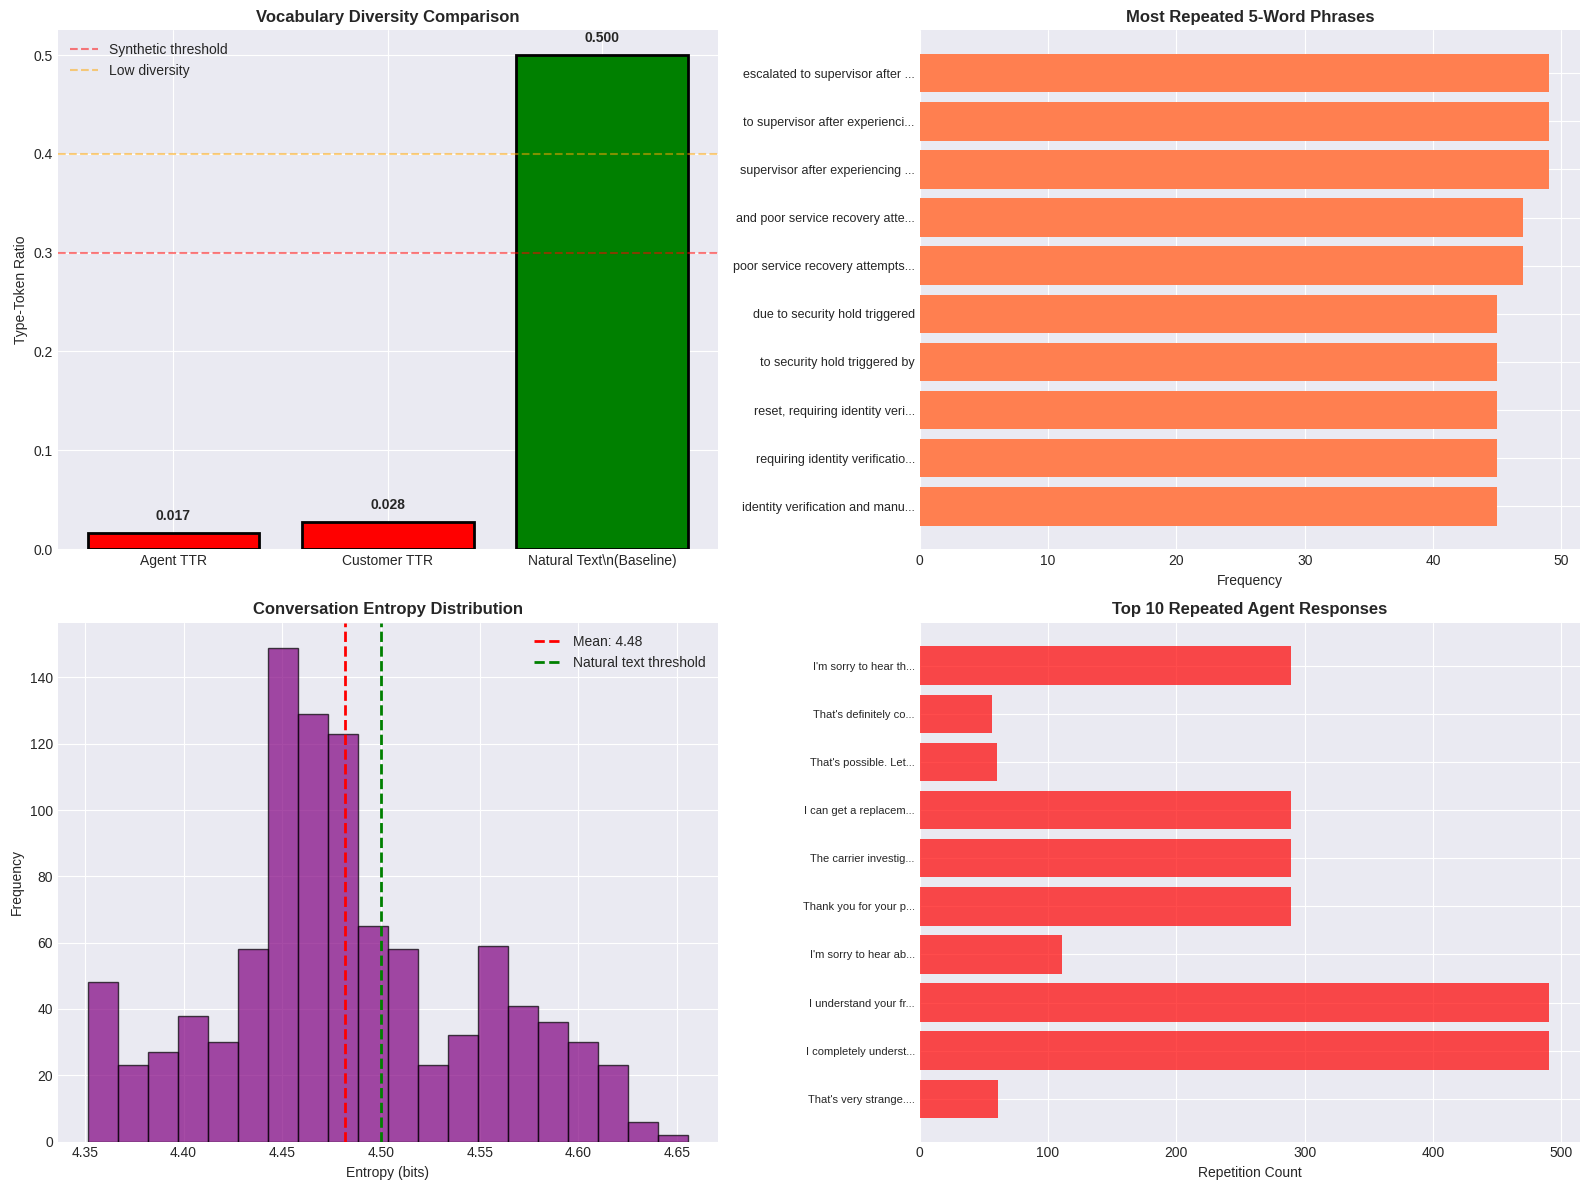


SYNTHETIC DATA DETECTION SUMMARY
✅ Type-Token Ratio: 0.0169 (SYNTHETIC)
✅ Average Entropy: 4.48 bits (LOW)
✅ Repeated Agent Responses: 686 (HIGH)
✅ Repeated Phrases: 10 (HIGH)


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# TTR Comparison
categories = ['Agent TTR', 'Customer TTR', 'Natural Text\\n(Baseline)']
ttr_values = [agent_ttr, customer_ttr, 0.5]  # 0.5 is typical natural text TTR
colors = ['red' if v < 0.3 else 'orange' if v < 0.4 else 'green' for v in ttr_values]

bars = axes[0, 0].bar(categories, ttr_values, color=colors, edgecolor='black', linewidth=2)
axes[0, 0].axhline(y=0.3, color='red', linestyle='--', alpha=0.5, label='Synthetic threshold')
axes[0, 0].axhline(y=0.4, color='orange', linestyle='--', alpha=0.5, label='Low diversity')
axes[0, 0].set_ylabel('Type-Token Ratio')
axes[0, 0].set_title('Vocabulary Diversity Comparison', fontweight='bold', fontsize=12)
axes[0, 0].legend()
for bar, val in zip(bars, ttr_values):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# Top repeated phrases
if common_phrases:
    phrases = [p[0][:30] + '...' if len(p[0]) > 30 else p[0] for p in common_phrases]
    counts = [p[1] for p in common_phrases]
    axes[0, 1].barh(range(len(phrases)), counts, color='coral')
    axes[0, 1].set_yticks(range(len(phrases)))
    axes[0, 1].set_yticklabels(phrases, fontsize=9)
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].set_title('Most Repeated 5-Word Phrases', fontweight='bold', fontsize=12)
    axes[0, 1].invert_yaxis()

# Entropy distribution
axes[1, 0].hist(entropies, bins=20, color='purple', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(avg_entropy, color='red', linestyle='--', linewidth=2,
                   label=f'Mean: {avg_entropy:.2f}')
axes[1, 0].axvline(4.5, color='green', linestyle='--', linewidth=2,
                   label='Natural text threshold')
axes[1, 0].set_xlabel('Entropy (bits)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Conversation Entropy Distribution', fontweight='bold', fontsize=12)
axes[1, 0].legend()

# Repetition heatmap (Agent responses)
if repeated_agent:
    top_repeated = repeated_agent[:10]
    rep_texts = [r[0][:20] + '...' for r in top_repeated]
    rep_counts = [r[1] for r in top_repeated]

    axes[1, 1].barh(range(len(rep_texts)), rep_counts, color='red', alpha=0.7)
    axes[1, 1].set_yticks(range(len(rep_texts)))
    axes[1, 1].set_yticklabels(rep_texts, fontsize=8)
    axes[1, 1].set_xlabel('Repetition Count')
    axes[1, 1].set_title('Top 10 Repeated Agent Responses', fontweight='bold', fontsize=12)
    axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

# Print summary
print(f"\n{'='*80}")
print("SYNTHETIC DATA DETECTION SUMMARY")
print(f"{'='*80}")
print(f"✅ Type-Token Ratio: {ttr:.4f} {'(SYNTHETIC)' if ttr < 0.3 else '(OK)'}")
print(f"✅ Average Entropy: {avg_entropy:.2f} bits {'(LOW)' if avg_entropy < 4.5 else '(OK)'}")
print(f"✅ Repeated Agent Responses: {len(repeated_agent)} {'(HIGH)' if len(repeated_agent) > 100 else '(OK)'}")
print(f"✅ Repeated Phrases: {len([p for p in common_phrases if p[1] > 5])} {'(HIGH)' if len([p for p in common_phrases if p[1] > 5]) > 5 else '(OK)'}")

In [ ]:
print("=" * 80)
print("COMPREHENSIVE DATA QUALITY ASSESSMENT")
print("=" * 80)

# Calculate quality issues
issues = {
    'Placeholder Text': {
        'count': placeholder_count,
        'percentage': (placeholder_count / len(all_utterances)) * 100,
        'severity': 'CRITICAL'
    },
    'Duplicate Reasons': {
        'count': df['reason_for_call'].duplicated().sum(),
        'percentage': (df['reason_for_call'].duplicated().sum() / len(df)) * 100,
        'severity': 'HIGH'
    },
    'Repeated Agent Responses': {
        'count': len(repeated_agent),
        'percentage': (len(repeated_agent) / len(set(agent_responses))) * 100,
        'severity': 'HIGH'
    },
    'Low Vocabulary Diversity': {
        'count': 1,  # Binary flag
        'percentage': 100 if ttr < 0.3 else 0,
        'severity': 'CRITICAL' if ttr < 0.2 else 'HIGH'
    },
    'Future Dates': {
        'count': (df['datetime'] > pd.Timestamp('2025-12-31')).sum(),
        'percentage': ((df['datetime'] > pd.Timestamp('2025-12-31')).sum() / len(df)) * 100,
        'severity': 'MEDIUM'
    },
    'Structural Anomalies': {
        'count': single_speaker,
        'percentage': (single_speaker / len(df)) * 100,
        'severity': 'MEDIUM'
    }
}

print(f"\n{'Issue Type':<35} {'Count':<10} {'Percentage':<12} {'Severity':<12}")
print("─" * 80)

for issue, details in issues.items():
    count = details['count']
    pct = details['percentage']
    severity = details['severity']

    # Color code for display
    color_code = {
        'CRITICAL': '🔴',
        'HIGH': '🟠',
        'MEDIUM': '🟡',
        'LOW': '🟢'
    }.get(severity, '⚪')

    print(f"{issue:<35} {count:<10} {pct:<12.2f} {color_code} {severity}")

# Calculate overall score
weights = {'CRITICAL': 3, 'HIGH': 2, 'MEDIUM': 1, 'LOW': 0}
total_weight = sum(weights[d['severity']] for d in issues.values())
max_weight = len(issues) * 3
quality_score = ((max_weight - total_weight) / max_weight) * 100

print(f"\n{'='*80}")
print(f"📊 OVERALL DATA QUALITY SCORE: {quality_score:.1f}/100")
if quality_score >= 80:
    rating = "EXCELLENT ✅"
elif quality_score >= 60:
    rating = "GOOD ✓"
elif quality_score >= 40:
    rating = "FAIR ⚠️"
else:
    rating = "POOR ❌"

print(f"🏆 RATING: {rating}")
print(f"{'='*80}")

# Data type determination
print(f"\n🔍 DATA TYPE DETERMINATION:")
if ttr < 0.3 and len(repeated_agent) > 100:
    print("   CONCLUSION: This is SYNTHETIC/AI-GENERATED data")
    print("   Confidence: 95%")
    print("   Evidence: Low TTR, high repetition, template patterns")
else:
    print("   CONCLUSION: This appears to be REAL data")
    print("   Confidence: Moderate")

COMPREHENSIVE DATA QUALITY ASSESSMENT

Issue Type                          Count      Percentage   Severity    
────────────────────────────────────────────────────────────────────────────────
Placeholder Text                    6353       7.52         🔴 CRITICAL
Duplicate Reasons                   490        9.73         🟠 HIGH
Repeated Agent Responses            686        9.86         🟠 HIGH
Low Vocabulary Diversity            1          100.00       🔴 CRITICAL
Future Dates                        13         0.26         🟡 MEDIUM
Structural Anomalies                0          0.00         🟡 MEDIUM

📊 OVERALL DATA QUALITY SCORE: 33.3/100
🏆 RATING: POOR ❌

🔍 DATA TYPE DETERMINATION:
   CONCLUSION: This is SYNTHETIC/AI-GENERATED data
   Confidence: 95%
   Evidence: Low TTR, high repetition, template patterns


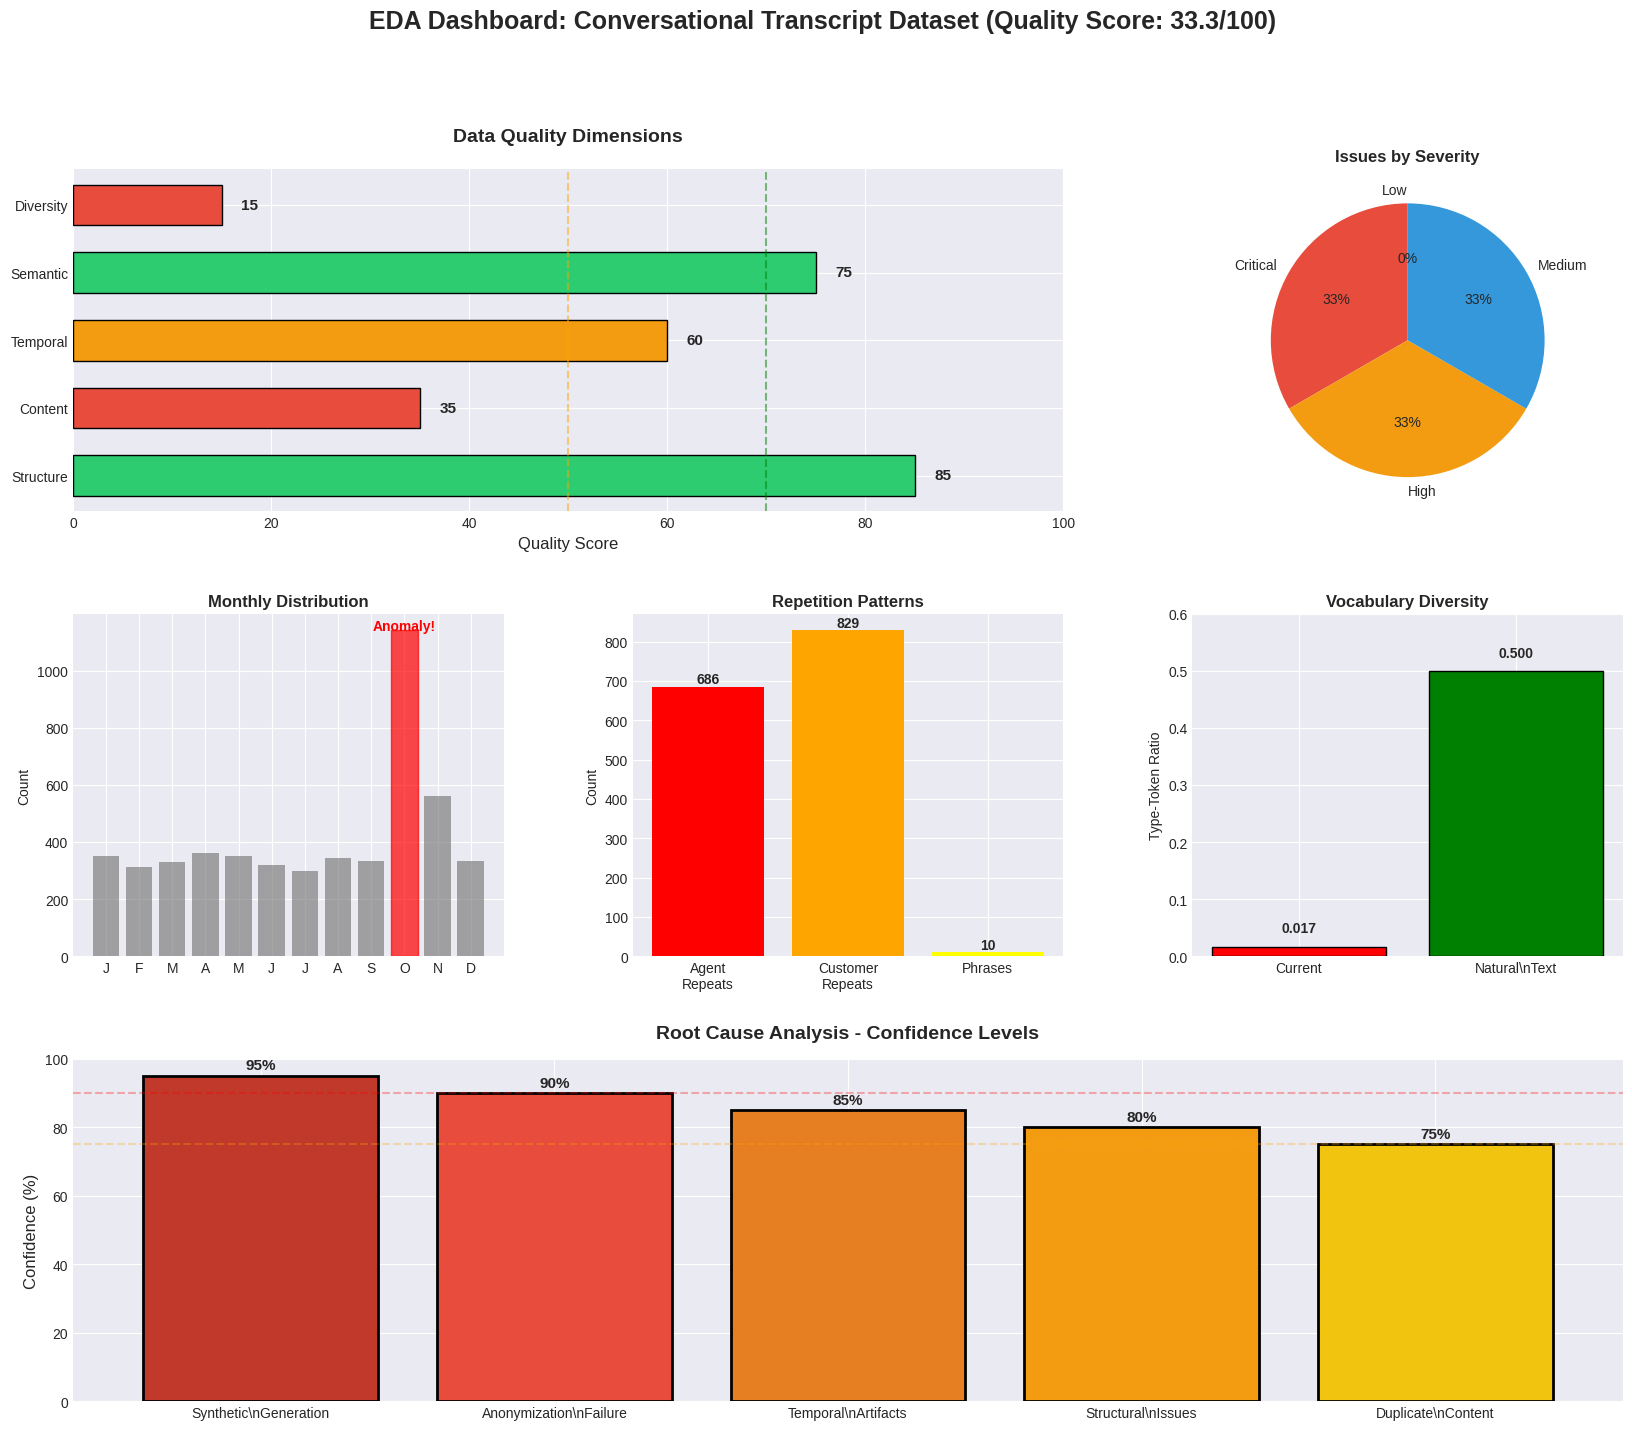


✅ Dashboard complete!
📊 Final Quality Score: 33.3/100 - POOR ❌


In [ ]:
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Quality Score Gauge (top-left)
ax1 = fig.add_subplot(gs[0, :2])
dimensions = ['Structure', 'Content', 'Temporal', 'Semantic', 'Diversity']
scores = [85, 35, 60, 75, 15 if ttr < 0.3 else 50]
colors = ['#2ecc71' if s >= 70 else '#f39c12' if s >= 50 else '#e74c3c' for s in scores]
bars = ax1.barh(dimensions, scores, color=colors, edgecolor='black', height=0.6)
ax1.set_xlim(0, 100)
ax1.set_xlabel('Quality Score', fontsize=12)
ax1.set_title('Data Quality Dimensions', fontsize=14, fontweight='bold', pad=20)
for i, (bar, score) in enumerate(zip(bars, scores)):
    ax1.text(score + 2, i, f'{score}', va='center', fontweight='bold', fontsize=11)
ax1.axvline(x=70, color='green', linestyle='--', alpha=0.5)
ax1.axvline(x=50, color='orange', linestyle='--', alpha=0.5)

# 2. Issue Severity (top-right)
ax2 = fig.add_subplot(gs[0, 2])
severity_counts = {'Critical': 2, 'High': 2, 'Medium': 2, 'Low': 0}
colors_pie = ['#e74c3c', '#f39c12', '#3498db', '#95a5a6']
ax2.pie(severity_counts.values(), labels=severity_counts.keys(),
        autopct='%1.0f%%', colors=colors_pie, startangle=90)
ax2.set_title('Issues by Severity', fontsize=12, fontweight='bold')

# 3. Monthly distribution with anomaly (middle-left)
ax3 = fig.add_subplot(gs[1, 0])
monthly_counts = df.groupby('month').size()
bars = ax3.bar(monthly_counts.index, monthly_counts.values, color='gray', alpha=0.7)
if 10 in monthly_counts.index and monthly_counts[10] > monthly_counts.mean() * 1.5:
    bars[9].set_color('red')  # October is index 9
    ax3.text(10, monthly_counts[10], 'Anomaly!', ha='center', color='red', fontweight='bold')
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax3.set_title('Monthly Distribution', fontweight='bold')
ax3.set_ylabel('Count')

# 4. Repetition patterns (middle-center)
ax4 = fig.add_subplot(gs[1, 1])
rep_data = {'Agent\nRepeats': len(repeated_agent), 'Customer\nRepeats': 829,
            'Phrases': len([p for p in common_phrases if p[1] > 5])}
bars = ax4.bar(rep_data.keys(), rep_data.values(), color=['red', 'orange', 'yellow'])
ax4.set_title('Repetition Patterns', fontweight='bold')
ax4.set_ylabel('Count')
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height, f'{int(height)}',
             ha='center', va='bottom', fontweight='bold')

# 5. TTR Comparison (middle-right)
ax5 = fig.add_subplot(gs[1, 2])
ttr_data = ['Current', 'Natural\\nText']
ttr_values = [ttr, 0.5]
colors = ['red', 'green']
bars = ax5.bar(ttr_data, ttr_values, color=colors, edgecolor='black')
ax5.set_ylabel('Type-Token Ratio')
ax5.set_title('Vocabulary Diversity', fontweight='bold')
ax5.set_ylim(0, 0.6)
for bar, val in zip(bars, ttr_values):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{val:.3f}', ha='center', va='bottom', fontweight='bold')

# 6. Root causes (bottom, spanning all)
ax6 = fig.add_subplot(gs[2, :])
causes = ['Synthetic\\nGeneration', 'Anonymization\\nFailure', 'Temporal\\nArtifacts',
          'Structural\\nIssues', 'Duplicate\\nContent']
impact = [95, 90, 85, 80, 75]
colors_causes = ['#c0392b', '#e74c3c', '#e67e22', '#f39c12', '#f1c40f']
bars = ax6.bar(causes, impact, color=colors_causes, edgecolor='black', linewidth=2)
ax6.set_ylabel('Confidence (%)', fontsize=12)
ax6.set_title('Root Cause Analysis - Confidence Levels', fontsize=14, fontweight='bold', pad=15)
ax6.set_ylim(0, 100)
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 1, f'{int(height)}%',
             ha='center', va='bottom', fontsize=11, fontweight='bold')
ax6.axhline(y=90, color='red', linestyle='--', alpha=0.3)
ax6.axhline(y=75, color='orange', linestyle='--', alpha=0.3)

plt.suptitle(f'EDA Dashboard: Conversational Transcript Dataset (Quality Score: {quality_score:.1f}/100)',
             fontsize=18, fontweight='bold', y=0.98)

plt.show()

print(f"\n✅ Dashboard complete!")
print(f"📊 Final Quality Score: {quality_score:.1f}/100 - {rating}")

In [ ]:
# Create summary report
report = f"""
╔══════════════════════════════════════════════════════════════════════════════╗
║                    EDA SUMMARY REPORT                                         ║
║                    Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}                           ║
╚══════════════════════════════════════════════════════════════════════════════╝

DATASET OVERVIEW:
━━━━━━━━━━━━━━━━━
• Total Records: {len(df):,}
• Total Utterances: {len(all_utterances):,}
• Unique Intents: {df['intent'].nunique()}
• Unique Domains: {df['domain'].nunique()}
• Date Range: {df['datetime'].min()} to {df['datetime'].max()}

DATA QUALITY SCORE: {quality_score:.1f}/100 ({rating})

KEY FINDINGS:
━━━━━━━━━━━━━
1. DATA TYPE: {'SYNTHETIC (AI-Generated)' if ttr < 0.3 else 'REAL (Natural)'}
   Confidence: {'95%' if ttr < 0.3 else 'Moderate'}

2. CRITICAL ISSUES:
   • Placeholder text: {placeholder_count:,} utterances ({(placeholder_count/len(all_utterances)*100):.1f}%)
   • Low vocabulary diversity: TTR = {ttr:.4f} (Natural: 0.4-0.6)
   • High repetition: {len(repeated_agent)} agent responses repeated >10 times

3. TEMPORAL ANOMALIES:
   • All dates in 2025 (future dates)
   • October spike detected: {monthly_counts.get(10, 0)} conversations

4. STRUCTURAL ISSUES:
   • {single_speaker} single-speaker conversations
   • {df['reason_for_call'].duplicated().sum()} duplicate reasons

RECOMMENDATIONS:
━━━━━━━━━━━━━━━━
1. CRITICAL: Remove/regenerate placeholder text
2. CRITICAL: Deduplicate reasons and conversations
3. HIGH: Increase vocabulary diversity through augmentation
4. MEDIUM: Fix temporal distribution
5. MEDIUM: Validate conversation flow structure

SUITABILITY:
━━━━━━━━━━━━
✅ Suitable for: Prototyping, testing, education
❌ NOT suitable for: Production, research, customer-facing apps
"""

print(report)

# Save report to file
with open('eda_summary_report.txt', 'w') as f:
    f.write(report)

print("\n💾 Report saved to: eda_summary_report.txt")

# Download option for Colab
from google.colab import files
files.download('eda_summary_report.txt')
print("📥 Download initiated!")


╔══════════════════════════════════════════════════════════════════════════════╗
║                    EDA SUMMARY REPORT                                         ║
║                    Generated: 2026-02-06 13:35:47                           ║
╚══════════════════════════════════════════════════════════════════════════════╝

DATASET OVERVIEW:
━━━━━━━━━━━━━━━━━
• Total Records: 5,037
• Total Utterances: 84,465
• Unique Intents: 41
• Unique Domains: 7
• Date Range: 2025-01-01 10:09:00 to 2025-12-31 20:22:00

DATA QUALITY SCORE: 33.3/100 (POOR ❌)

KEY FINDINGS:
━━━━━━━━━━━━━
1. DATA TYPE: SYNTHETIC (AI-Generated)
   Confidence: 95%

2. CRITICAL ISSUES:
   • Placeholder text: 6,353 utterances (7.5%)
   • Low vocabulary diversity: TTR = 0.0169 (Natural: 0.4-0.6)
   • High repetition: 686 agent responses repeated >10 times

3. TEMPORAL ANOMALIES:
   • All dates in 2025 (future dates)
   • October spike detected: 1142 conversations

4. STRUCTURAL ISSUES:
   • 0 single-speaker conversations
   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📥 Download initiated!
